In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('./exercises/fb.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('./exercises/earthquakes.csv')

<AxesSubplot:title={'center':'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

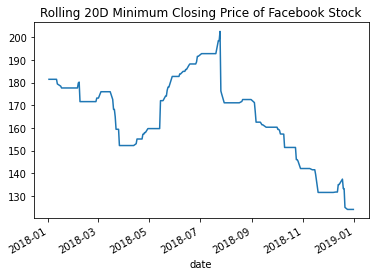

In [8]:
fb.close.rolling('20D').min().plot(title='Rolling 20D Minimum Closing Price of Facebook Stock')

<AxesSubplot:title={'center':"Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

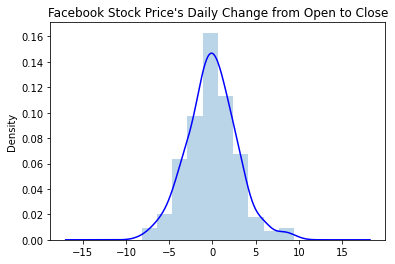

In [9]:
series = fb.assign(differential=fb.open - fb.close).differential
ax = series.plot(kind='hist', density=True, alpha=0.3)
series.plot(kind='kde', color='blue', ax=ax, title='Facebook Stock Price\'s Daily Change from Open to Close')

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

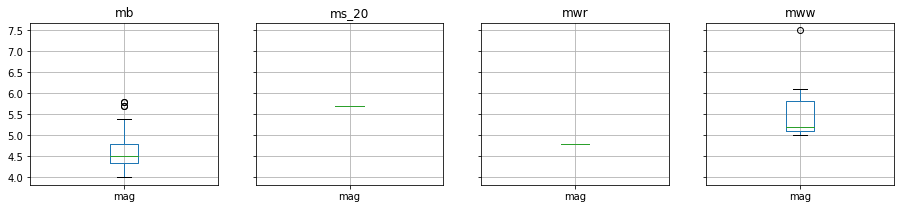

In [10]:
quakes.query(
    'parsed_place == "Indonesia"'
)[['mag', 'magType']].groupby('magType').boxplot(
    layout=(1, 4), figsize=(15, 3)
)

<AxesSubplot:title={'center':'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

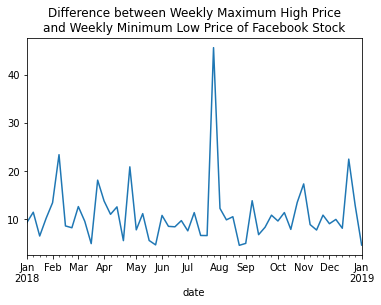

In [11]:
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(
    title='Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'
)

<AxesSubplot:title={'center':'After hours trading monthly effect'}, xlabel='date'>

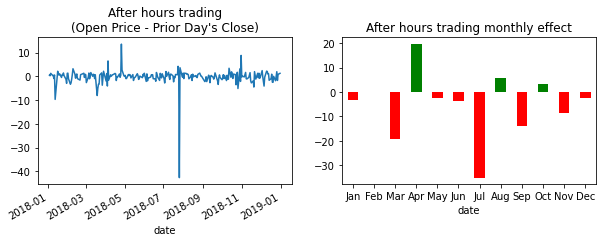

In [12]:

series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)